# Import Libraries

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Create dataset

In [132]:
n = 100
bound = 100

x = np.random.randint(0, bound, (n))
y = 4.5 * x + np.random.randint(-bound, bound, (n)) * np.random.uniform(0, 1, (n))

In [133]:
print(f"X: {x.shape}")
print(f"Y: {y.shape}")

X: (100,)
Y: (100,)


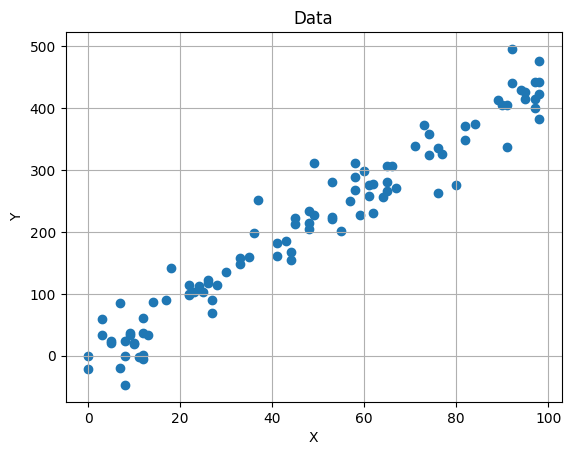

In [143]:
plt.scatter(x, y)
plt.title("Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

# Model

In [144]:
def forward_prop(x, w, b):
    """Calculates y_hat"""
    return w * x + b

def calc_loss(y_hat, y_true):
    """Calculates the loss"""
    return (y_hat - y_true) ** 2

def loss_derivative(y_hat, y_true):
    """Calculates the derivative of the loss with respect to y_hat"""
    return 2 * (y_hat - y_true)

def gradient_descent(x, y, y_hat, w, b, learning_rate):
    """Calculates the derivative of the loss with respect to the model parameters and updates them using gradient descent."""
    # calculate partial derivative of loss with respect to y_hat
    dloss_dyhat = loss_derivative(y_hat, y)

    # calculate partial derivative of loss with respect to w
    dloss_dw = dloss_dyhat * x

    # calculate parital derivative of loss with respect to b
    dloss_db = dloss_dyhat

    # take average of derivatives
    dloss_dw = np.average(dloss_dw)
    dloss_db = np.average(dloss_db)

    # update parameters
    w -= learning_rate * dloss_dw
    b -= learning_rate * dloss_db

    return w, b


def train(x, y, w, b, epochs, learning_rate):
    """Train the model"""
    for e in range(epochs):
        print(f"Epoch {e}")
        y_hat = forward_prop(x, w, b)
        loss = np.average(calc_loss(y_hat, y))
        print(f"Loss: {loss}\n")
        w, b = gradient_descent(x, y, y_hat, w, b, learning_rate)

    return w, b

# Training

In [145]:
w = np.random.randint(1, 10)
b = np.random.randint(1, 10)

epochs = 10
learning_rate = 0.0001

w, b = train(x, y, w, b, epochs, learning_rate)

Epoch 0
Loss: 69143.30080383363

Epoch 1
Loss: 9681.637415812404

Epoch 2
Loss: 2181.594368508582

Epoch 3
Loss: 1235.5945269743688

Epoch 4
Loss: 1116.2717996116219

Epoch 5
Loss: 1101.219830104482

Epoch 6
Loss: 1099.3197803519213

Epoch 7
Loss: 1099.0786138042113

Epoch 8
Loss: 1099.046686327518

Epoch 9
Loss: 1099.0411508469301



In [146]:
print("Learned parameters: ")
print(f"w = {w}")
print(f"b = {b}")

Learned parameters: 
w = 4.406814853213153
b = 1.927485784544375


# Plot regression line

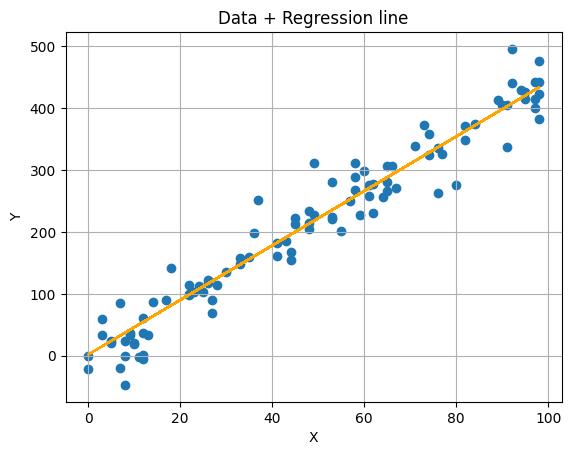

In [148]:
plt.scatter(x, y)
plt.plot(x, x * w + b, color="orange")
plt.title("Data + Regression line")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()